# Simple example of a homogeneous ensemble using learning networks

In this simple example, no bagging is used, so every atomic model
gets the same learned parameters, unless the atomic model training
algorithm has randomness, eg, DecisionTree with random subsampling
of features at nodes.

Note that MLJ has a built in model wrapper called `EnsembleModel`
for creating bagged ensembles with a few lines of code.

## Definition of composite model type

In [1]:
using MLJ
using Plots; pyplot(size=(200*2, 120*2))
import Statistics

learning network (composite model spec):

In [2]:
Xs = source()
ys = source(kind=:target)

atom = @load DecisionTreeRegressor
atom.n_subfeatures = 4 # to ensure diversity among trained atomic models

machines = (machine(atom, Xs, ys) for i in 1:100)

Base.Generator{UnitRange{Int64},Main.##408.var"#1#2"}(Main.##408.var"#1#2"(), 1:100)

overload `mean` for nodes:

In [3]:
Statistics.mean(v...) = mean(v)
Statistics.mean(v::AbstractVector{<:AbstractNode}) = node(mean, v...)

yhat = mean([predict(m, Xs) for  m in machines]);

new composite model type and instance:

In [4]:
one_hundred_models = @from_network OneHundredModels(atom=atom) <= yhat

Main.##408.OneHundredModels(atom = DecisionTreeRegressor(pruning_purity_threshold = 0.0,
                                                         max_depth = -1,
                                                         min_samples_leaf = 5,
                                                         min_samples_split = 2,
                                                         min_purity_increase = 0.0,
                                                         n_subfeatures = 4,
                                                         post_prune = false,),) @ 1…09

## Application to data

In [5]:
X, y = @load_boston;

tune regularization parameter for a *single* tree:

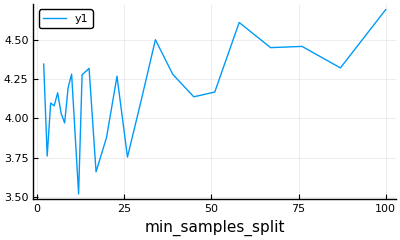

In [6]:
r = range(atom,
          :min_samples_split,
          lower=2,
          upper=100, scale=:log)

mach = machine(atom, X, y)

curve = learning_curve!(mach,
                        range=r,
                        measure=mav,
                        resampling=CV(nfolds=9),
                        verbosity=0)

plot(curve.parameter_values, curve.measurements, xlab=curve.parameter_name)

tune regularization parameter for all trees in ensemble simultaneously:

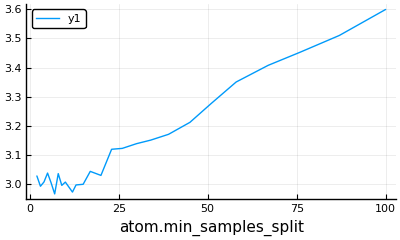

In [7]:
r = range(one_hundred_models,
          :(atom.min_samples_split),
          lower=2,
          upper=100, scale=:log)

mach = machine(one_hundred_models, X, y)

curve = learning_curve!(mach,
                        range=r,
                        measure=mav,
                        resampling=CV(nfolds=9),
                        verbosity=0)

plot(curve.parameter_values, curve.measurements, xlab=curve.parameter_name)

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*